# Tutorial Assignment
Students are required to perform data cleaning, data preprocessing, and data visualisation on the given dataset using Python. The assignment also includes an optional Linear Regression model for bonus marks.

Tasks include:

- Understanding and cleaning the dataset
- Handling missing values and preprocessing data
- Creating meaningful visualisations
- (Bonus) Building and evaluating a Linear Regression model

Submission: Jupyter Notebook (.ipynb)

Deadline: 26th Jan, 2026

Tools: Python, Pandas, Matplotlib/Seaborn, Scikit-learn

Ensure your notebook is well-commented and includes brief explanations for each step.


I am building this notebook as a template for future code so that I don't need to keep rewriting the same code, but can have a quick start.

In [86]:
# @title Data Loading

# All imports in one location
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_squared_log_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Connecting Drive data
# Dropping data into drive and then connecting here
# When reusing this code, update the location and file name
drive.mount('/content/drive')
project_path = "/content/drive/MyDrive/Automobile.csv"

# Labeling the data frame from the csv in Drive
# if using multiple files, I will need multiple df_... names
# and that should be updated here
df = pd.read_csv(project_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
# @title Understanding the Data

# Showing head, tail, shape, columns, dTypes, info, and describe for the data
print("\nDF Head")
print(df.head())

print("\nDF Tail")
print(df.tail())

print("\nDF Shape")
print(df.shape)

print("\nDF Columns")
print(df.columns)

print("\nDF dTypes")
print(df.dtypes)

print("\nDF Info")
print(df.info())

print("\nDF Describe")
print(df.describe())


DF Head
                        name   mpg  cylinders  displacement  horsepower  \
0  chevrolet chevelle malibu  18.0          8         307.0       130.0   
1          buick skylark 320  15.0          8         350.0       165.0   
2         plymouth satellite  18.0          8         318.0       150.0   
3              amc rebel sst  16.0          8         304.0       150.0   
4                ford torino  17.0          8         302.0       140.0   

   weight  acceleration  model_year origin  
0    3504          12.0          70    usa  
1    3693          11.5          70    usa  
2    3436          11.0          70    usa  
3    3433          12.0          70    usa  
4    3449          10.5          70    usa  

DF Tail
                name   mpg  cylinders  displacement  horsepower  weight  \
393  ford mustang gl  27.0          4         140.0        86.0    2790   
394        vw pickup  44.0          4          97.0        52.0    2130   
395    dodge rampage  32.0          

In [88]:
# @title Data Cleaning

print("Pre Cleaning Null/Dupe Check")
print(df.isnull().sum())
df = df.dropna()
df = df.drop_duplicates()

print("\nPost Cleaning Null/Dupe Drop")
print(df.isnull().sum())

Pre Cleaning Null/Dupe Check
name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

Post Cleaning Null/Dupe Drop
name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [89]:
# @title Fix Columns - if needed

# I don't think anything is needed for this dataset
# But I am going to leave this portion so that I can use this
# as a template for future code and don't have to keep
# rebuilding this stuff each time

#Correct incorrect data types
# df['column_name'] = pd.to_datetime(df['column_name'])
print("No change to data types")

#Rename columns for clarity
# df = df.rename(coluns={old_name': 'new_name'})

print("No changes to column names")

No change to data types
No changes to column names


In [90]:
# @title Encoding & Scaling

# Encoding categorical: category, object, bool
df = pd.get_dummies(df, columns=['origin'])

# Scaling numerical: int, float
scaler = StandardScaler()
numerical_columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [91]:
# @title Features (X) & Target (y)
# Label the Target for the train test split
Target = 'mpg'
Other_Drop = 'name'
X = df.drop([Target, Other_Drop], axis=1)
y = df[Target]

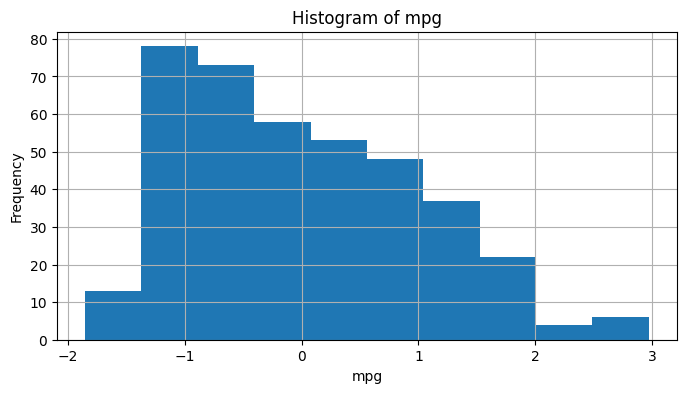

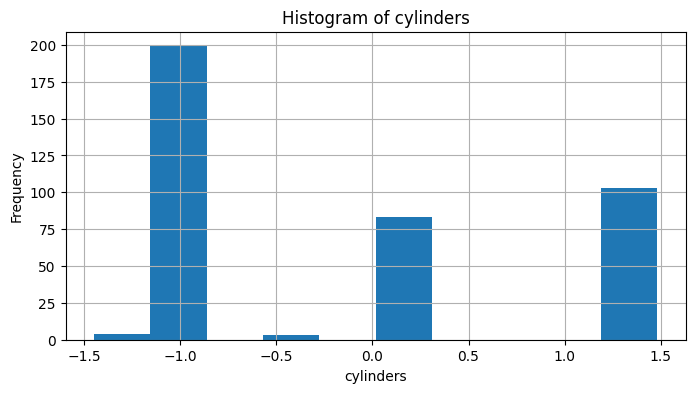

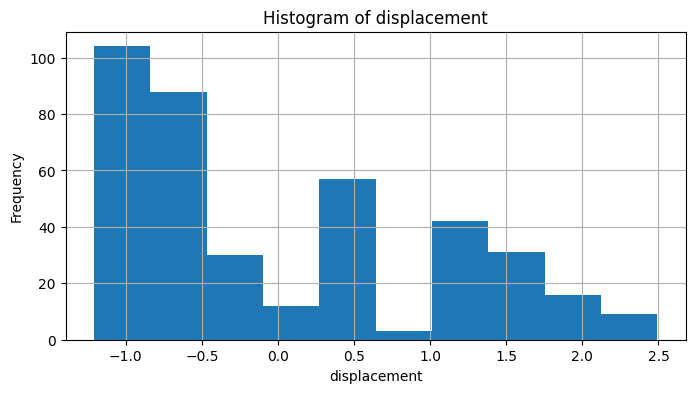

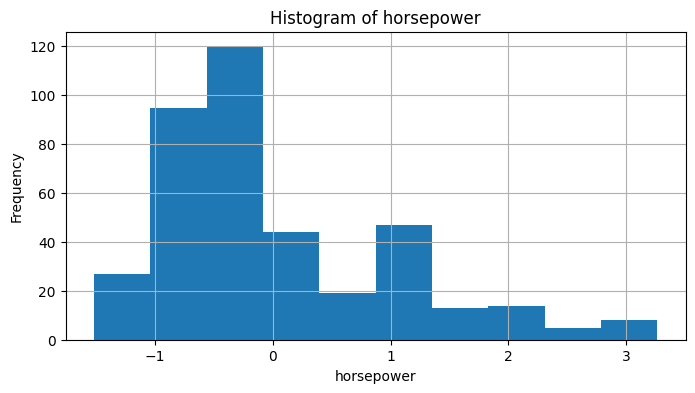

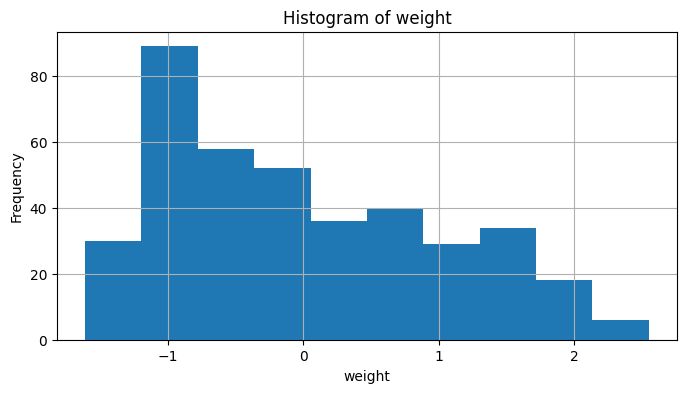

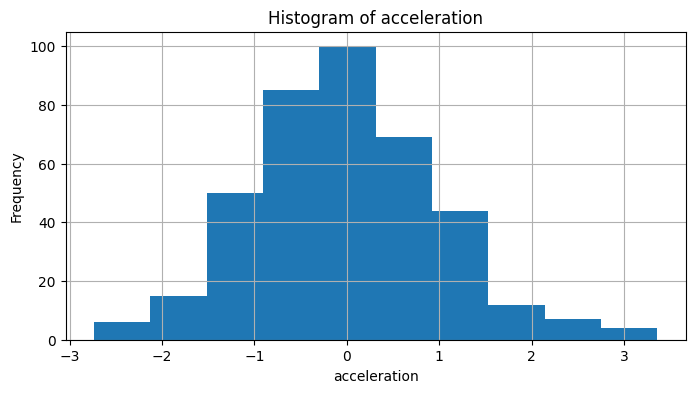

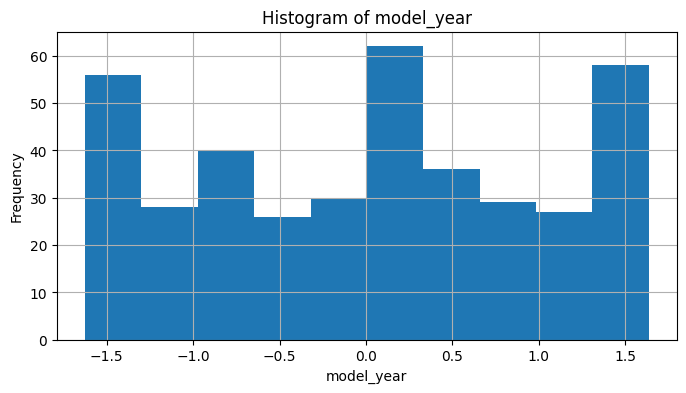

In [92]:
# @title Histogram

# Looping through each numerical
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    df[column].hist()
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [93]:
# @title Boxplot

# Labeling the exact field wanted for X axis
X_Axis = 'origin'

# Looping through each numerical
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    df.boxplot(column=column, by=X_Axis, grid=False)
    plt.title(f"Boxplot of {column} by {X_Axis}")
    plt.suptitle('')
    plt.xlabel(X_Axis)
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

KeyError: 'origin'

<Figure size 1000x600 with 0 Axes>

In [ ]:
# @title Bar Chart

X_Axis = 'origin'
numerical_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    df.groupby(X_Axis)[column].mean().plot(kind='bar')
    plt.title(f"Bar Chart of Mean {column} by {X_Axis}")
    plt.xlabel(X_Axis)
    plt.ylabel(f"Mean {column}")
    plt.grid(True)
    plt.show()


In [ ]:
# @title Scatter Plot

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[column], df[Target], alpha=0.5)
    plt.title(f"Scatter Plot of {Target} vs {column}")
    plt.xlabel(column)
    plt.ylabel(Target)
    plt.grid(True)
    plt.show()

In [ ]:
# @title Correlation Heatmap

numerical_df = df[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Linear Regression

In [ ]:
# @title Split data and train model

# split data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training the actual model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# @title Evaulatin the model

print("Mean Absolute Error", mean_absolute_error(y_test,y_pred))
print("Mean Squared Error", mean_squared_error(y_test, y_pred))
print("R² Score", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()
